# Лабораторная работа № 3. Титаник

На основе данных конкурса [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) постройте модель логистической регресси для предсказания выживших пассажиров.

## Задание

1. Постройте классификатор используя доступные числовые признаки.
2. Оцените точность и полноту классификации. Постройте график ROC кривой.
3. Расширьте пространство признаков на основе имени пассажира и оцените качество новой модели.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


ds = pd.read_csv("train.csv")
ds

Populating the interactive namespace from numpy and matplotlib


F:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [132]:
df = ds[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df = pd.DataFrame(df.dropna())
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


In [133]:
df["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [134]:
df['Embarked'] = df['Embarked'].map({ 'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

In [135]:
df["Embarked"].value_counts()

0    554
1    130
2     28
Name: Embarked, dtype: int64

In [136]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,2
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
889,1,1,1,26.0,0,0,30.0000,1


In [137]:
x = pd.DataFrame(df[[ "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
y = pd.DataFrame(df['Survived'])

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
770,3,1,24.0,0,0,9.5000,0
737,1,1,35.0,0,0,512.3292,1
143,3,1,19.0,0,0,6.7500,2
478,3,1,22.0,0,0,7.5208,0
52,1,0,49.0,1,0,76.7292,1
...,...,...,...,...,...,...,...
480,3,1,9.0,5,2,46.9000,0
583,1,1,36.0,0,0,40.1250,1
866,2,0,27.0,1,0,13.8583,1
400,3,1,39.0,0,0,7.9250,0


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_valid = preprocessing.scale(x_valid)
clf = LogisticRegression().fit(x_train, y_train.values.ravel())
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predict = clf.predict(x_valid)
print("Precision ", precision_score(y_valid.values, y_predict))
print("Recall ", recall_score(y_valid.values, y_predict))

Precision  0.7391304347826086
Recall  0.7183098591549296


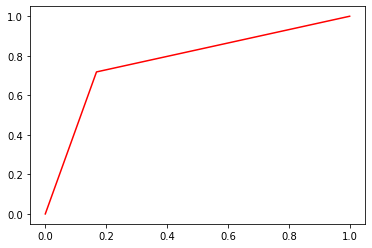

In [139]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

# Расширенная модель

In [180]:
df = pd.DataFrame(ds[["Name", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].dropna())
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,"Braund, Mr. Owen Harris",0,3,1,22.0,1,0,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,1,0,71.2833,C
2,"Heikkinen, Miss. Laina",1,3,0,26.0,0,0,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,1,0,53.1000,S
4,"Allen, Mr. William Henry",0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,0,39.0,0,5,29.1250,Q
886,"Montvila, Rev. Juozas",0,2,1,27.0,0,0,13.0000,S
887,"Graham, Miss. Margaret Edith",1,1,0,19.0,0,0,30.0000,S
889,"Behr, Mr. Karl Howell",1,1,1,26.0,0,0,30.0000,C


In [181]:
df['Name'].value_counts()



Longley, Miss. Gretchen Fiske                            1
Sutehall, Mr. Henry Jr                                   1
Partner, Mr. Austen                                      1
Sundman, Mr. Johan Julian                                1
Pears, Mr. Thomas Clinton                                1
                                                        ..
Gallagher, Mr. Martin                                    1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)      1
Nirva, Mr. Iisakki Antino Aijo                           1
Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)    1
Stranden, Mr. Juho                                       1
Name: Name, Length: 712, dtype: int64

In [182]:
df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()


Mr          398
Miss        145
Mrs         107
Master       36
Rev           6
Dr            6
Mlle          2
Col           2
Major         2
Sir           1
Jonkheer      1
Capt          1
Don           1
Mme           1
Lady          1
Ms            1
Countess      1
Name: Name, dtype: int64

In [183]:
df['Embarked'] = df['Embarked'].map({ 'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
df['Name'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).map({'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Lady' : 2, 'Ms' : 2})
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0,3,1,22.0,1,0,7.2500,0
1,1.0,1,1,0,38.0,1,0,71.2833,1
2,2.0,1,3,0,26.0,0,0,7.9250,0
3,1.0,1,1,0,35.0,1,0,53.1000,0
4,0.0,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,1.0,0,3,0,39.0,0,5,29.1250,2
886,NaN,0,2,1,27.0,0,0,13.0000,0
887,2.0,1,1,0,19.0,0,0,30.0000,0
889,0.0,1,1,1,26.0,0,0,30.0000,1


In [184]:
for i in range(0, df.shape[0]):
    if np.isnan(df['Name'].iloc[i]):
        df['Name'].iloc[i] = 3.0

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [185]:
df['Name'].value_counts()

0.0    398
2.0    147
1.0    107
3.0     60
Name: Name, dtype: int64

In [186]:
df

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0,3,1,22.0,1,0,7.2500,0
1,1.0,1,1,0,38.0,1,0,71.2833,1
2,2.0,1,3,0,26.0,0,0,7.9250,0
3,1.0,1,1,0,35.0,1,0,53.1000,0
4,0.0,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,1.0,0,3,0,39.0,0,5,29.1250,2
886,3.0,0,2,1,27.0,0,0,13.0000,0
887,2.0,1,1,0,19.0,0,0,30.0000,0
889,0.0,1,1,1,26.0,0,0,30.0000,1


In [187]:
x = pd.DataFrame(df[["Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
y = pd.DataFrame(df['Survived'])

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25)
x_train

,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
796,3.0,1,0,49.0,0,0,25.9292,0
254,1.0,3,0,41.0,0,2,20.2125,0
195,2.0,1,0,58.0,0,0,146.5208,1
346,2.0,2,0,40.0,0,0,13.0000,0
445,3.0,1,1,4.0,0,2,81.8583,0
...,...,...,...,...,...,...,...,...
360,0.0,3,1,40.0,1,4,27.9000,0
876,0.0,3,1,20.0,0,0,9.8458,0
592,0.0,3,1,47.0,0,0,7.2500,0
721,0.0,3,1,17.0,1,0,7.0542,0


In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
x_train = preprocessing.scale(x_train)
x_valid = preprocessing.scale(x_valid)
clf = LogisticRegression().fit(x_train, y_train.values.ravel())
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predict = clf.predict(x_valid)
print("Precision ", precision_score(y_valid.values, y_predict))
print("Recall ", recall_score(y_valid.values, y_predict))

Precision  0.7352941176470589
Recall  0.6756756756756757


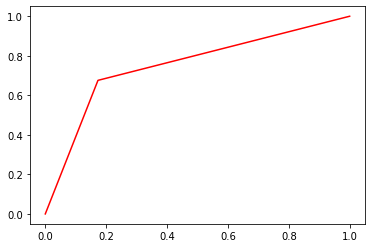

In [189]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

# Вывод
Дополнение признаков уведичили показатели модели